In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ks_2samp
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Display all columns
pd.set_option('display.max_columns', None)

In [5]:
# Load the datasets
historical_data = pd.read_csv("historical_data.csv")
fear_greed_index = pd.read_csv("fear_greed_index.csv")

print("=== Historical Data Preview ===")
display(historical_data.head())

print("\n=== Fear & Greed Index Preview ===")
display(fear_greed_index.head())

=== Historical Data Preview ===


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



=== Fear & Greed Index Preview ===


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
# Convert Dates to Datetime
historical_data['date'] = pd.to_datetime(historical_data['Timestamp'], errors='coerce')
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'], errors='coerce')

# Drop rows with invalid dates
historical_data.dropna(subset=['date'], inplace=True)
fear_greed_index.dropna(subset=['date'], inplace=True)

In [8]:
# Merge on data
merged_df = pd.merge(historical_data, fear_greed_index, on='date', how='inner')
print(f"Merged dataset shape: {merged_df.shape}")
display(merged_df.head())

Merged dataset shape: (0, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification


In [9]:
# Missing values check
print("\n=== Missing Values in Merged Data ===")
print(merged_df.isnull().sum())

# Fill missing numeric columns with median
for col in merged_df.select_dtypes(include=np.number).columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())


=== Missing Values in Merged Data ===
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
timestamp           0
value               0
classification      0
dtype: int64


In [13]:
for col in merged_df.columns:
    try:
        merged_df[col] = pd.to_numeric(merged_df[col])
    except (ValueError, TypeError):
        pass  # leave column as is if it can't be converted


In [26]:
# Convert Timestamp in historical_data to datetime
historical_data['date'] = pd.to_datetime(historical_data['Timestamp'], unit='ms').dt.date

# Ensure fear_greed_data['date'] is also in date format (no time component)
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date']).dt.date

# Merge
merged_df = pd.merge(historical_data, fear_greed_index, on='date', how='inner')

print(merged_df.shape)
print(merged_df.head())


(184263, 20)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

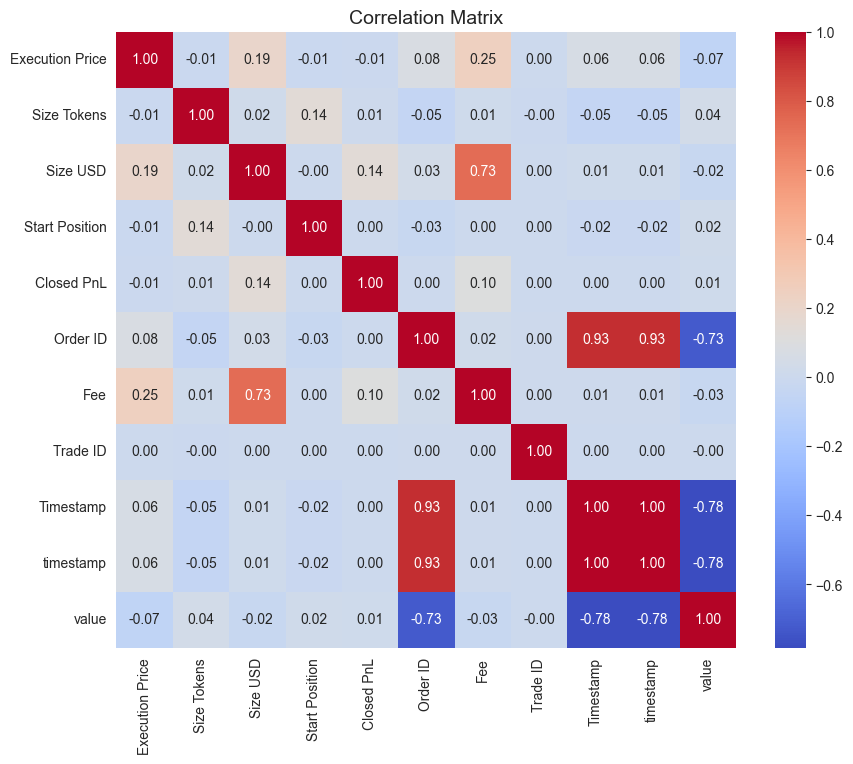

In [27]:
# Correlation Analysis
numeric_cols = merged_df.select_dtypes(include=np.number).columns
correlation_matrix = merged_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# Pearson & Spearman correlation between Trader Performance & Market Sentiment
if 'trader_performance' in numeric_cols and 'fear_greed_value' in numeric_cols:
    pearson_corr, _ = pearsonr(merged_df['trader_performance'], merged_df['fear_greed_value'])
    spearman_corr, _ = spearmanr(merged_df['trader_performance'], merged_df['fear_greed_value'])
    
    print(f"Pearson Correlation: {pearson_corr:.4f}")
    print(f"Spearman Correlation: {spearman_corr:.4f}")

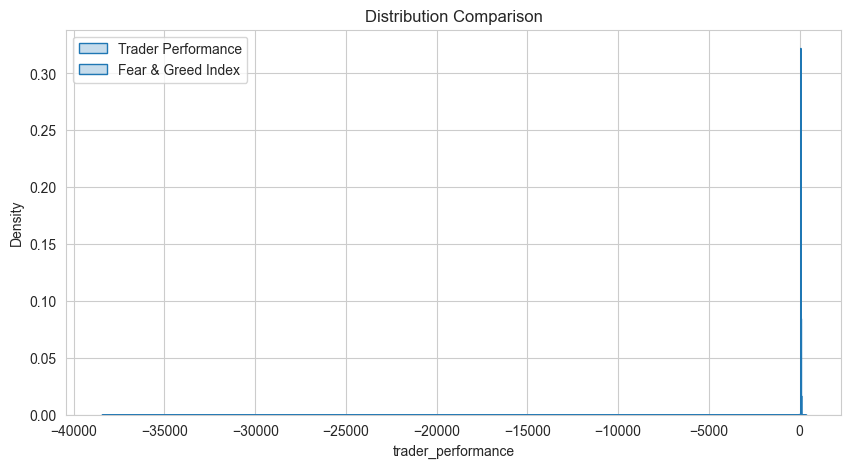

In [31]:
# Distribution Comparison
merged_df['trader_performance'] = (merged_df['Closed PnL'] / merged_df['Size USD']) * 100
merged_df.rename(columns={'value': 'fear_greed_value'}, inplace=True)
plt.figure(figsize=(10, 5))
sns.kdeplot(merged_df['trader_performance'], label='Trader Performance', fill=True)
sns.kdeplot(merged_df['fear_greed_value'], label='Fear & Greed Index', fill=True)
plt.title("Distribution Comparison")
plt.legend()
plt.show()


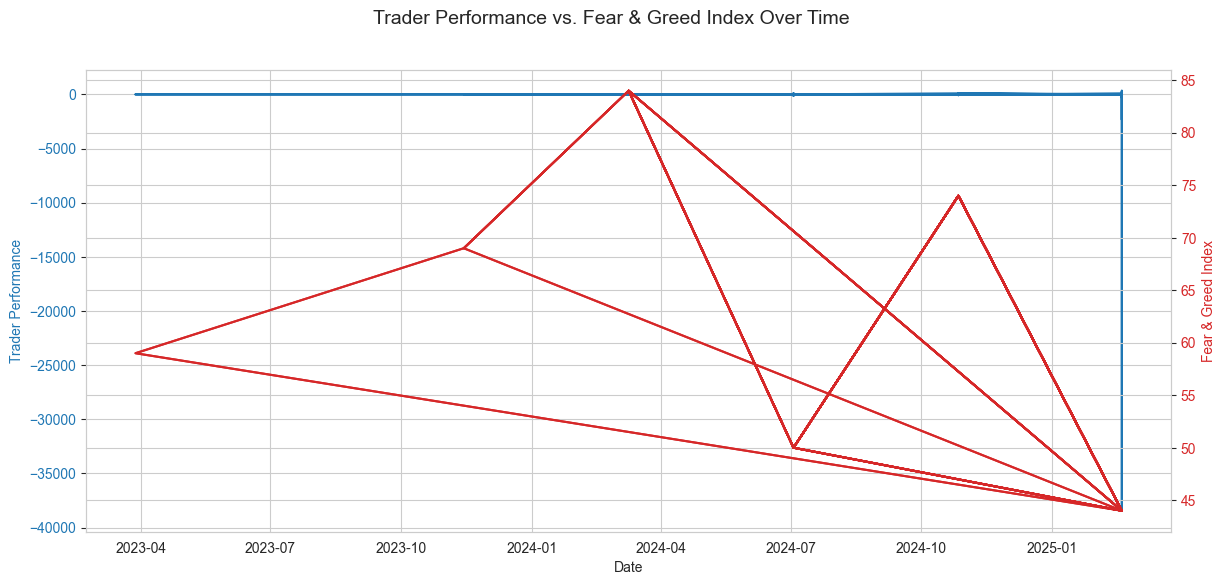

In [33]:
# Time-Series Visualization
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Trader Performance', color='tab:blue')
ax1.plot(merged_df['date'], merged_df['trader_performance'], color='tab:blue', label='Trader Performance')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Fear & Greed Index', color='tab:red')
ax2.plot(merged_df['date'], merged_df['fear_greed_value'], color='tab:red', label='Fear & Greed Index')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.suptitle('Trader Performance vs. Fear & Greed Index Over Time', fontsize=14)
plt.show()

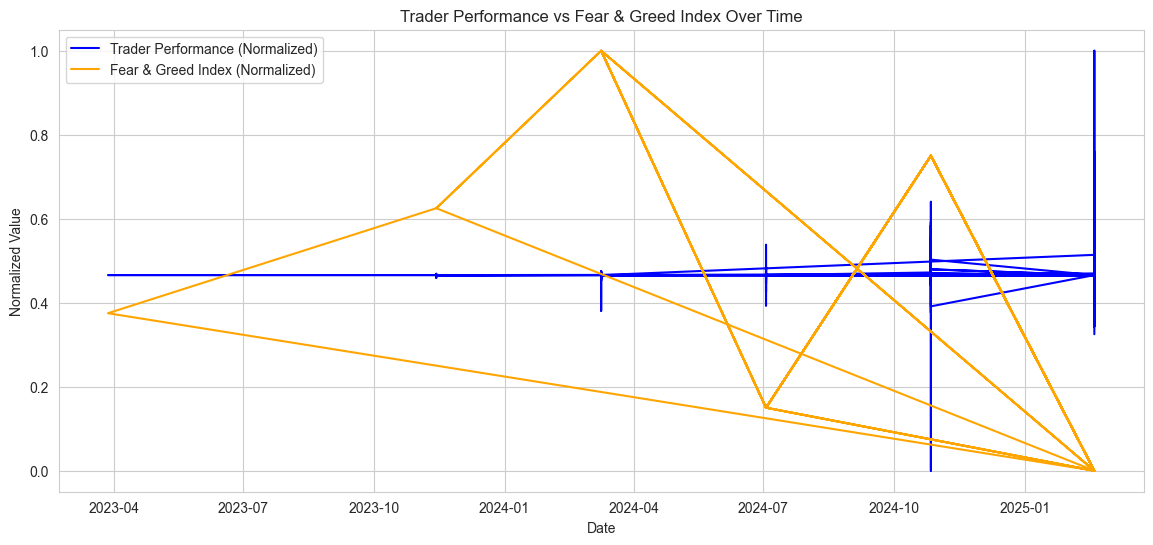

In [41]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Rename for clarity
merged_df['trader_performance'] = merged_df['Closed PnL']
merged_df['fear_greed_value'] = merged_df['value']

# Normalize
scaler = MinMaxScaler()
merged_df[['trader_performance_norm', 'fear_greed_norm']] = scaler.fit_transform(
    merged_df[['trader_performance', 'fear_greed_value']]
)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(merged_df['date'], merged_df['trader_performance_norm'], label='Trader Performance (Normalized)', color='blue')
plt.plot(merged_df['date'], merged_df['fear_greed_norm'], label='Fear & Greed Index (Normalized)', color='orange')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Trader Performance vs Fear & Greed Index Over Time')
plt.legend()
plt.show()


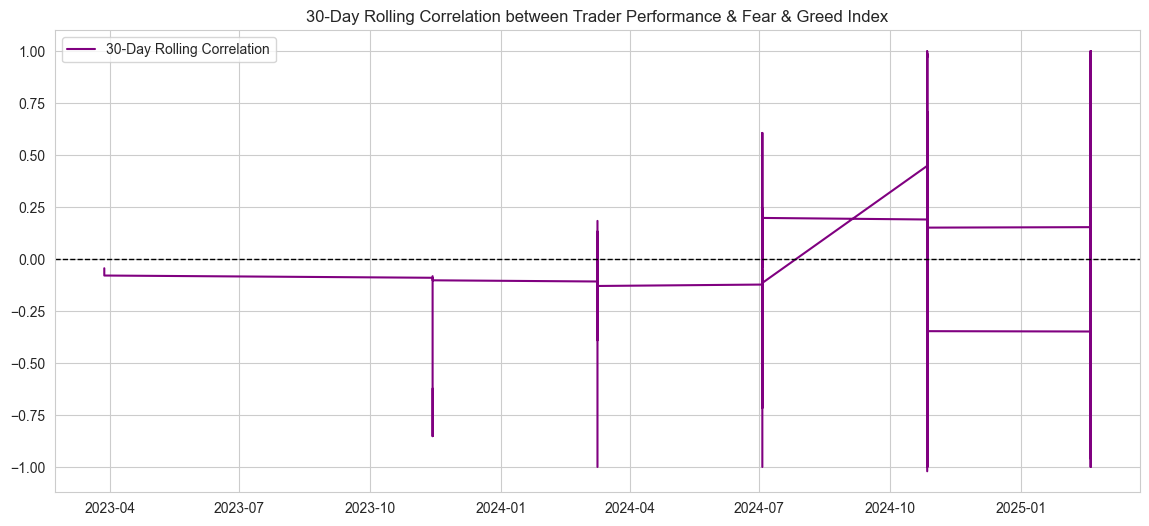

In [42]:
merged_df['rolling_corr'] = merged_df['trader_performance'].rolling(30).corr(merged_df['fear_greed_value'])

plt.figure(figsize=(14, 6))
plt.plot(merged_df['date'], merged_df['rolling_corr'], label='30-Day Rolling Correlation', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("30-Day Rolling Correlation between Trader Performance & Fear & Greed Index")
plt.legend()
plt.show()

In [43]:
print("\nAnalysis Complete ✅")



Analysis Complete ✅
